# How to use the LSD objects

In this tutorial, we highlight the basic functionality of the LSD class. This includes loading in LSD profiles, making quick graphs, slicing the data, and slightly more advanced capabilities such as normalizing the profiles and changing the LSD weights (wpol and wint).

The class functions to calculate Bz is demonstrated in [Calculating the longitudinal field and False Alarm Probability](6-CalculateBz_Tutorial.ipynb).

First import `specpolFlow` and any other packages.

In [1]:
import specpolFlow as pol

## 1. Loading and displaying LSD profiles
The <a href='../API/LSD_API.html#specpolFlow.LSD'>LSD profile object</a> contains the variables (as numpy arrays):

* vel - the velocity grid 
* specI & specSigI - the Stokes I profile and its uncertainties
* specV & specSigV - the Stokes V polarization profile and its uncertainties
* specN1 & specSigN1 - the Null1 profile and its uncertainties
* specN2 & specSigN2 - the (optional) Null2 profile and its uncertainties 
* header - the header of the file that was read to create the lsd_prof

Here we use the <a href='../API/LSD_API.html#specpolFlow.read_lsd'>read_lsd</a> function to read in an LSD profile file ([SampleLSD.lsd](https://github.com/folsomcp/specpolFlow/blob/main/docs-jb/Tutorials/CalculateBz_tutorialfiles/SampleLSD.lsd)) as an object. 

In [2]:
# pol.read_lsd is used to read lsd data into an object
lsd1 = pol.read_lsd('CalculateBz_tutorialfiles/SampleLSD.lsd')

One can plot the LSD profile with the <a href='../API/LSD_API.html#specpolFlow.LSD.plot'>plot</a> function of the LSD object. This function has an optional argument `figsize` that determines the size of the image created; the default is (10,10).  The `plot` function returns a matplotlib figure, and a list containing the axes object in that figure.

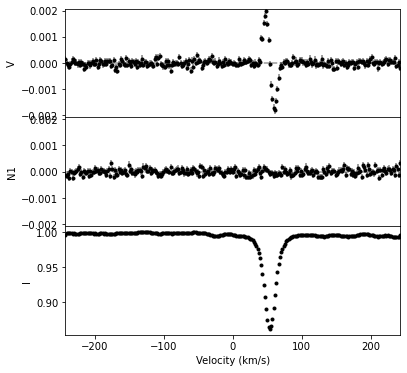

In [3]:
# setting the figsize argument in iolsd.plot 
fig, ax = lsd1.plot(figsize=(6,6))

## 2. Slicing LSD profiles
You can select subsections of LSD data in the same way you manipulate numpy arrays (e.g. [start:stop]). More advanced indexing can also be used, for example getting the portion of an LSD profile in a specific velocity range.

55
55


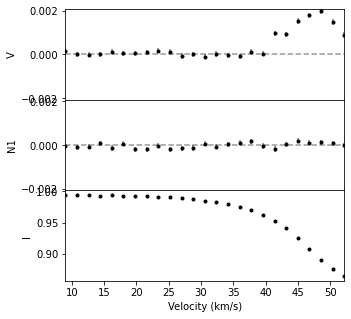

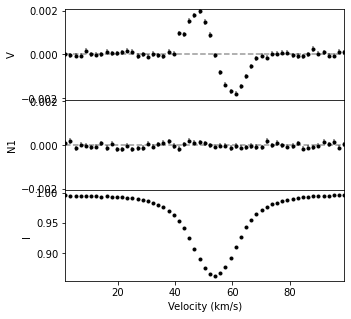

In [4]:
# slicing LSD objects uses the same syntax as slicing typical numpy arrays
lsdslice = lsd1[140:165]
fig, ax = lsdslice.plot(figsize=(5,5))

# this will create an lsd profile with all data points where vel>0 and vel<100
# (i.e. all points in the velocity range 0 to 100 km/s)
lsdpos = lsd1[lsd1.vel > 0.0]
lsdpos = lsdpos[lsdpos.vel < 100.0]
fig, ax = lsdpos.plot(figsize=(5,5))

# you can also return the length (number of pixels) of the LSD profile using
print(lsdpos.npix)
# or
print(len(lsdpos))

## 3. Normalization, weights, and velocity shifts
We can normalize a LSD profile to a different continuum level using the <a href='../API/LSD_API.html#specpolFlow.LSD.norm'>norm</a> function. From this, the continuum normalized Stokes parameters and the error bars are adjusted accordingly. 

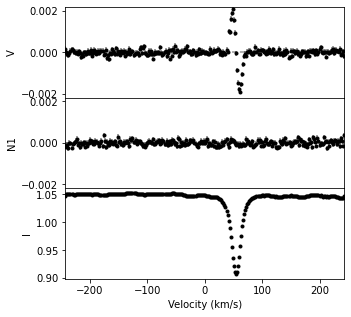

In [5]:
# renormalizing the lsd profile and plotting the new results
lsdnorm = lsd1.norm(0.95)
fig, ax = lsdnorm.plot(figsize=(5,5))

To apply a radial velocity shift to the LSD profile, you can use the <a href='../API/LSD_API.html#specpolFlow.LSD.vshift'>vshift</a> function, providing the value in km/s to shift the profile by.

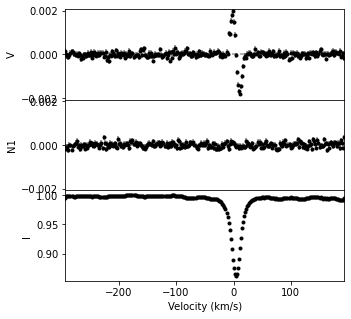

In [6]:
# you can apply a radial velocity shift to the LSD profile
lsd_shifted = lsd1.vshift(50.0)
fig, ax = lsd_shifted.plot(figsize=(5,5))

# vshift returns a new LSD object rather than modifying the existing one.
# If you just want the plots, the above lines can be combined like:
# fig, ax = lsd1.vshift(50.0).plot(figsize=(5,5))

Two methods for adjusting the LSD weights are shown below.  The the <a href='../API/LSD_API.html#specpolFlow.LSD.set_weights'>set_weights</a> function uses old and new intensity weights (wint_old, wint_new) and polarization weights (wpol_old, wpol_new).  The <a href='../API/LSD_API.html#specpolFlow.LSD.scale'>scale</a> function  uses scale factors for the intensity and polarization (scale_int and scale_pol).

(<Figure size 360x360 with 3 Axes>,
 array([<AxesSubplot:ylabel='V'>, <AxesSubplot:ylabel='N1'>,
        <AxesSubplot:xlabel='Velocity (km/s)', ylabel='I'>], dtype=object))

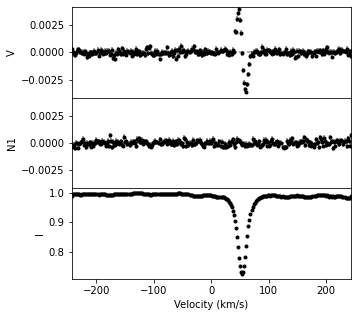

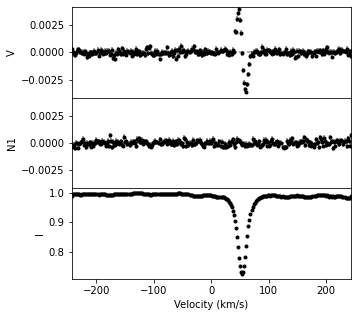

In [7]:
# we can adjust the LSD weights two ways. 

# 1. if you want to adjust to a new wint and wpol from old ones:
wint_old = 0.1
wpol_old = 60.
wint_new = 0.2
wpol_new = 120.

newlsd = lsd1.set_weights(wint_old, wpol_old, wint_new, wpol_new)
newlsd.plot(figsize=(5,5))

# 2. if you have already calculated the scale factors to go from old to new, you can simply do:
scale_int = 2.0
scale_pol = 2.0

newlsd = lsd1.scale(scale_int, scale_pol)
newlsd.plot(figsize=(5,5))

# (In fact, the set_weights function just calls the scale function with new/old.)

## 4. Saving LSD profiles
We can save the LSD profiles by using the <a href='../API/LSD_API.html#specpolFlow.LSD.save'>save</a> class function.

In [8]:
lsd1.save('CalculateBz_tutorialfiles/MyNewLSD.lsd')

## 5. Calculating radial velocities

### Radial velocity from Gaussian fitting

The radial velocity can be estimated by fitting a Gaussian to the LSD profile and taking the centroid of the Gaussian as the radial velocity.  The <a href='../API/LSD_API.html#specpolFlow.LSD.fit_gaussian_rv'>fit_gaussian_rv</a> function of the LSD class does this.  This approach takes the uncertainty on the radial velocity from the diagonal of the covariance matrix from the final $\chi^2$ fit.  Thus the uncertainty depends on the input Stokes I LSD profile uncertainties, albeit indirectly.  The Gaussian fitting approach is relatively insensitive to the velocity range of the LSD profile used, but it can be thrown off by distortions in the line shape (e.g. temperature or chemical spots).

rv estimate 53.87010 +/- 0.04558 km/s
rv estimate 53.87046 +/- 0.04550 km/s
rv estimate 53.87046 +/- 0.08564 km/s


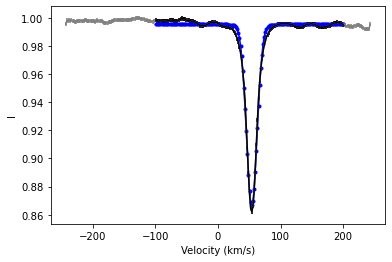

In [9]:
# The simplest radial velocity estimate
rv, rv_err = lsd1.fit_gaussian_rv()
print('rv estimate {:.5f} +/- {:.5f} km/s'.format(rv, rv_err))

# Sometimes it can help to restrict the RV fit to a range closer to the line center
rv, rv_err = lsd1.fit_gaussian_rv(velrange=(-100., +200.))
print('rv estimate {:.5f} +/- {:.5f} km/s'.format(rv, rv_err))

# There is an option to scale the uncertainty by the square root of the reduced chi**2
# although often this leads to an overestimate of the RV uncertainty.  
rv, rv_err = lsd1.fit_gaussian_rv(velrange=(-100., +200.), scaleErrs=True)
print('rv estimate {:.5f} +/- {:.5f} km/s'.format(rv, rv_err))

# It can also be helpful to plot the fit to the observation
rv, rv_err = lsd1.fit_gaussian_rv(velrange=(-100., +200.), plotFit=True)